In [1]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [2]:
def master_df():
    master = pd.DataFrame()
    fpath='../congress-data/house/'
    files=os.listdir(fpath)
    for file in files:
        
        congress = int(file.split('_')[1].split('.')[0])
        df = pd.read_csv(fpath + file, index_col=0, parse_dates=['dob'])
        df['congress'] = congress
        
        master = master.append(df, ignore_index=True)
    
    return master

In [4]:
house = master_df()

Interested in:
- dob
- gender
- party
- seniority
- missed_votees
- state
- congress

In [41]:
men = data[data['gender'] == 'M']
women = data[data['gender'] == 'F']
print('Men SS: %d' % len(men))
print('Women SS: %d' % len(women))

Men SS: 5598
Women SS: 1007


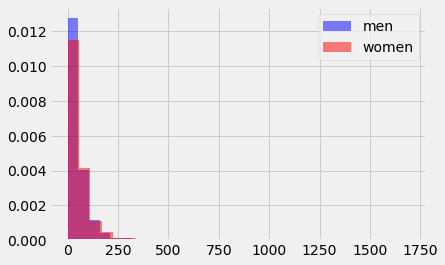

In [40]:
fig, ax = plt.subplots()
ax.hist(men['missed_votes'], normed=1, color='b', alpha=0.5, bins=30, label='men')
ax.hist(women['missed_votes'], normed=1, color='r', alpha=0.5, bins=30, label='women')
ax.legend();

This data does not follow a normal distribution. However, since the sample sizes are sufficiently large, we can use a t-test with a welsh distribution to determine which gender misses more votes, and if it is statistically significant.